In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Concatenate, LeakyReLU,ReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import AUC
import gdown
from sklearn.metrics import roc_curve,roc_auc_score,precision_recall_curve,f1_score,auc

In [2]:
!gdown --id 1-j4mRyKkFO4UYZ7KLs1iyIoqF7M2tnot #Meso4 -- original

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1-j4mRyKkFO4UYZ7KLs1iyIoqF7M2tnot
To: /content/Meso4_DF
100% 156k/156k [00:00<00:00, 83.9MB/s]


In [3]:
!gdown --id 1-RAu6z_jJ3XCXi3DrLMiRvQBAu2gEvUd  #Meso4_Inception

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1-RAu6z_jJ3XCXi3DrLMiRvQBAu2gEvUd
To: /content/MesoInception_DF.h5
100% 198k/198k [00:00<00:00, 86.0MB/s]


In [4]:
ls -l 

total 360
drwx------ 5 root root   4096 May 12 09:38 drive/
-rw-r--r-- 1 root root 156128 May 12 09:42 Meso4_DF
-rw-r--r-- 1 root root 197504 May 12 09:42 MesoInception_DF.h5
drwxr-xr-x 1 root root   4096 May  3 13:42 sample_data/


In [5]:
# Height and width refer to the size of the image
# Channels refers to the amount of color channels (red, green, blue)

image_dimensions = {'height':256, 'width':256, 'channels':3}
#image_dimensions = {'height':512, 'width':512, 'channels':3}

In [6]:
# Create a Classifier class

class Classifier:
    def __init__():
        self.model = 0
    
    def predict(self, x):
        return self.model.predict(x)
    
    def fit(self, x, y):
        return self.model.train_on_batch(x, y)
    
    def get_accuracy(self, x, y):
        return self.model.test_on_batch(x, y)
    
    def load(self, path):
        self.model.load_weights(path)

In [7]:
# Create a MesoNet class using the Classifier

class Meso4(Classifier):
    def __init__(self, learning_rate = 0.001): #0.001
        self.model = self.init_model()
        optimizer = SGD(lr = learning_rate) #Adam
        self.model.compile(optimizer = optimizer,
                           loss = 'binary_crossentropy',#'mean_squared_error',
                           metrics = ['accuracy'])
    
    def init_model(self): 
        x = Input(shape = (image_dimensions['height'],
                           image_dimensions['width'],
                           image_dimensions['channels']))
        activation_func = 'relu'
        x1 = Conv2D(8, (3, 3), padding='same', activation = activation_func)(x)
        x1 = BatchNormalization()(x1)
        x1 = MaxPooling2D(pool_size=(2, 2), padding='same')(x1)
        
        x2 = Conv2D(8, (5, 5), padding='same', activation = activation_func)(x1)
        x2 = BatchNormalization()(x2)
        x2 = MaxPooling2D(pool_size=(2, 2), padding='same')(x2)
        
        x3 = Conv2D(16, (5, 5), padding='same', activation = activation_func)(x2)
        x3 = BatchNormalization()(x3)
        x3 = MaxPooling2D(pool_size=(2, 2), padding='same')(x3)
        
        x4 = Conv2D(16, (5, 5), padding='same', activation = activation_func)(x3)
        x4 = BatchNormalization()(x4)
        x4 = MaxPooling2D(pool_size=(4, 4), padding='same')(x4)
        
        y = Flatten()(x4)
        #y = Dropout(0.5)(y)
        y = Dense(16)(y)
        y = ReLU()(y)
        #y = Dropout(0.5)(y)
        y = Dense(1, activation = 'sigmoid')(y)
        
        
        return Model(inputs = x, outputs = y)

In [8]:
#meso = Meso4()
#meso.load('Meso4_DF')

In [9]:
class MesoInception4(Classifier):
    def __init__(self, learning_rate = 0.001):
        self.model = self.init_model()
        optimizer = SGD(lr = learning_rate) #Adam
        self.model.compile(optimizer = optimizer, loss= 'binary_crossentropy', metrics= ['accuracy'] )#loss = 'mean_squared_error', metrics = ['accuracy'])
   
    activation_func = 'relu'
    def InceptionLayer(self, a, b, c, d):
        def func(x):
            activation_func = 'relu'
            x1 = Conv2D(a, (1, 1), padding='same', activation=activation_func)(x)
            x2 = Conv2D(b, (1, 1), padding='same', activation=activation_func)(x)
            x2 = Conv2D(b, (3, 3), padding='same', activation=activation_func)(x2)
            
            x3 = Conv2D(c, (1, 1), padding='same', activation=activation_func)(x)
            x3 = Conv2D(c, (3, 3), dilation_rate = 2, strides = 1, padding='same', activation='relu')(x3)
            
            x4 = Conv2D(d, (1, 1), padding='same', activation=activation_func)(x)
            x4 = Conv2D(d, (3, 3), dilation_rate = 3, strides = 1, padding='same', activation='relu')(x4)

            y = Concatenate(axis = -1)([x1, x2, x3, x4])
            
            return y
        return func
    
    def init_model(self):
        activation_func = 'relu'
        x = Input(shape = (image_dimensions['height'],
                           image_dimensions['width'],
                           image_dimensions['channels']))
        
        x1 = self.InceptionLayer(1, 4, 4, 2)(x)
        x1 = BatchNormalization()(x1)
        x1 = MaxPooling2D(pool_size=(2, 2), padding='same')(x1)
        
        x2 = self.InceptionLayer(2, 4, 4, 2)(x1)
        x2 = BatchNormalization()(x2)
        x2 = MaxPooling2D(pool_size=(2, 2), padding='same')(x2)        
        
        x3 = Conv2D(16, (5, 5), padding='same', activation = activation_func)(x2)
        x3 = BatchNormalization()(x3)
        x3 = MaxPooling2D(pool_size=(2, 2), padding='same')(x3)
        
        x4 = Conv2D(16, (5, 5), padding='same', activation = activation_func)(x3)
        x4 = BatchNormalization()(x4)
        x4 = MaxPooling2D(pool_size=(4, 4), padding='same')(x4)
        
        y = Flatten()(x4)
        y = Dropout(0.5)(y)
        y = Dense(16)(y)
        y = LeakyReLU(alpha=0.1)(y)
        y = Dropout(0.5)(y)
        y = Dense(1, activation = 'sigmoid')(y) #sigmoid

        return Model(inputs = x, outputs = y)

In [10]:
meso = MesoInception4()
meso.load('MesoInception_DF.h5')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [11]:
"""
# Prepare image data

# Rescaling pixel values (between 1 and 255) to a range between 0 and 1
dataGenerator = ImageDataGenerator(rescale=1./255)

# Instantiating generator to feed images through the network
generator = dataGenerator.flow_from_directory(
    '/content/drive/MyDrive/Deep_fake_detection/Task_2_3/evaluation/',    #/content/drive/MyDrive/Deep_fake_detection/Task_2_3/evaluation/real
    target_size=(256, 256),
    batch_size=1,
    class_mode='binary')
    """

"\n# Prepare image data\n\n# Rescaling pixel values (between 1 and 255) to a range between 0 and 1\ndataGenerator = ImageDataGenerator(rescale=1./255)\n\n# Instantiating generator to feed images through the network\ngenerator = dataGenerator.flow_from_directory(\n    '/content/drive/MyDrive/Deep_fake_detection/Task_2_3/evaluation/',    #/content/drive/MyDrive/Deep_fake_detection/Task_2_3/evaluation/real\n    target_size=(256, 256),\n    batch_size=1,\n    class_mode='binary')\n    "

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
# Recreating generator after removing '.ipynb_checkpoints'
dataGenerator = ImageDataGenerator(rescale=1./255)

generator = dataGenerator.flow_from_directory(
    '/content/drive/MyDrive/Deep_fake_detection/Task_2_3/Extracted_faces',#'/content/drive/MyDrive/Deep_fake_detection/Task_2_3/evaluation'
    target_size=(256, 256),
    batch_size=1,
    class_mode='binary')

# Re-checking class assignment after removing it
generator.class_indices

Found 571 images belonging to 2 classes.


{'fake': 0, 'real': 1}

Predicted likelihood: 0.0144
Actual label: 1

Correct prediction: False
/content/drive/MyDrive/Deep_fake_detection/Task_2_3/Extracted_faces


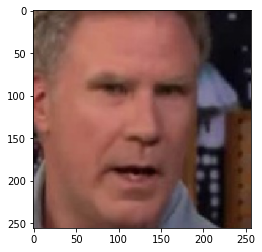

In [14]:
# Rendering image X with label y for MesoNet
X, y = generator.next()

# Evaluating prediction
print(f"Predicted likelihood: {meso.predict(X)[0][0]:.4f}")
print(f"Actual label: {int(y[0])}")
print(f"\nCorrect prediction: {round(meso.predict(X)[0][0])==y[0]}")

print(generator.directory)

# Showing image
plt.imshow(np.squeeze(X));

In [15]:
# Creating separate lists for correctly classified and misclassified images
correct_real = []
correct_real_pred = []

correct_deepfake = []
correct_deepfake_pred = []

misclassified_real = []
misclassified_real_pred = []

misclassified_deepfake = []
misclassified_deepfake_pred = []

In [16]:
#len(generator.labels)#.size
res=meso.predict(X)

In [17]:
res

array([[0.01440809]], dtype=float32)

In [18]:
# Generating predictions on validation set, storing in separate lists
y_test=[]
y_pred=[]
for i in range(len(generator.labels)):
    
    # Loading next picture, generating prediction
    X, y = generator.next()
    pred = meso.predict(X)[0][0]
    
    # Sorting into proper category
    if round(pred)==y[0] and y[0]==1:       #TP
        correct_real.append(X)
        correct_real_pred.append(pred)
    elif round(pred)==y[0] and y[0]==0:     #TN
        correct_deepfake.append(X)
        correct_deepfake_pred.append(pred)
    elif y[0]==1:                           #FP
        misclassified_real.append(X)
        misclassified_real_pred.append(pred)
    else:                                   #FN
        misclassified_deepfake.append(X)
        misclassified_deepfake_pred.append(pred)   
    y_test.append(y[0])
    y_pred.append(pred)
    
    # Printing status update
    if i % 100 == 0:
        print(i, ' predictions completed.')
    
    if i == len(generator.labels)-1:  
        print("All", len(generator.labels), "predictions completed")

    

0  predictions completed.
100  predictions completed.
200  predictions completed.
300  predictions completed.
400  predictions completed.
500  predictions completed.
All 571 predictions completed


In [19]:
#print(len(y_test))
print(y_test[:10])
#print(len(y_pred))
print(y_pred[:10])

[1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0016164352, 1.0, 0.6260266, 0.05042657, 0.017989933, 0.5050142, 0.9532453, 0.17826153, 0.9322997, 0.8151769]


In [20]:
def plotter(images,preds):
    fig = plt.figure(figsize=(16,9))
    subset = np.random.randint(0, len(images)-1, 12)
    for i,j in enumerate(subset):
        fig.add_subplot(3,4,i+1)
        plt.imshow(np.squeeze(images[j]))
        plt.xlabel(f"Model confidence: \n{preds[j]:.4f}")
        plt.tight_layout()
        ax = plt.gca()
        ax.axes.xaxis.set_ticks([])
        ax.axes.yaxis.set_ticks([])
    plt.show;
    return

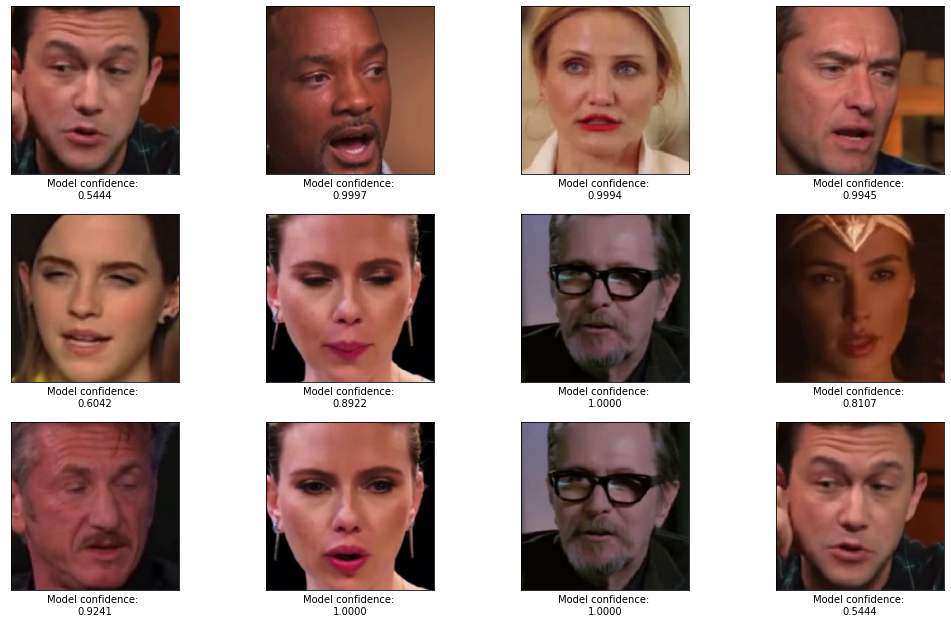

In [21]:
plotter(correct_real, correct_real_pred)

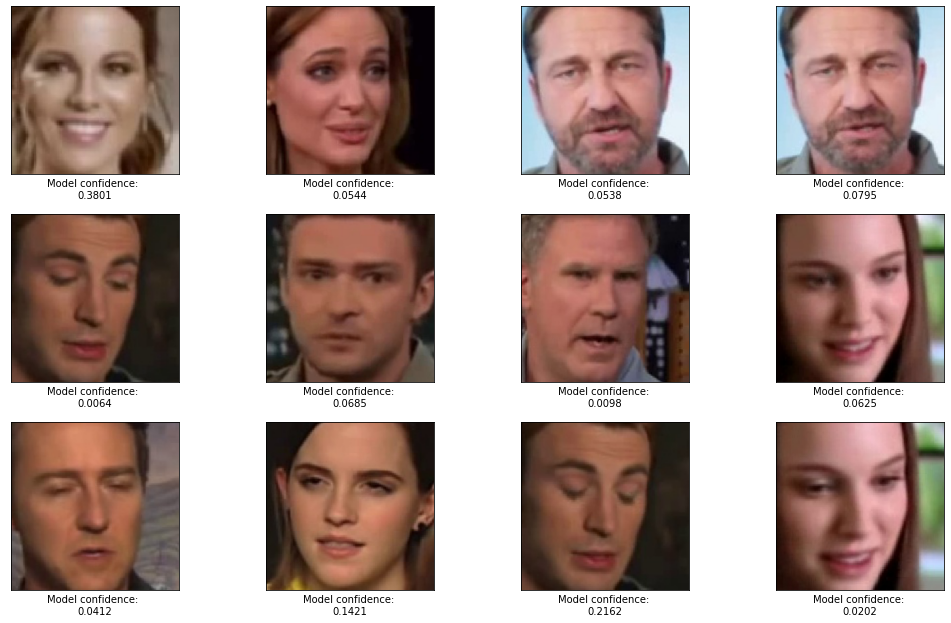

In [22]:
plotter(misclassified_real, misclassified_real_pred)

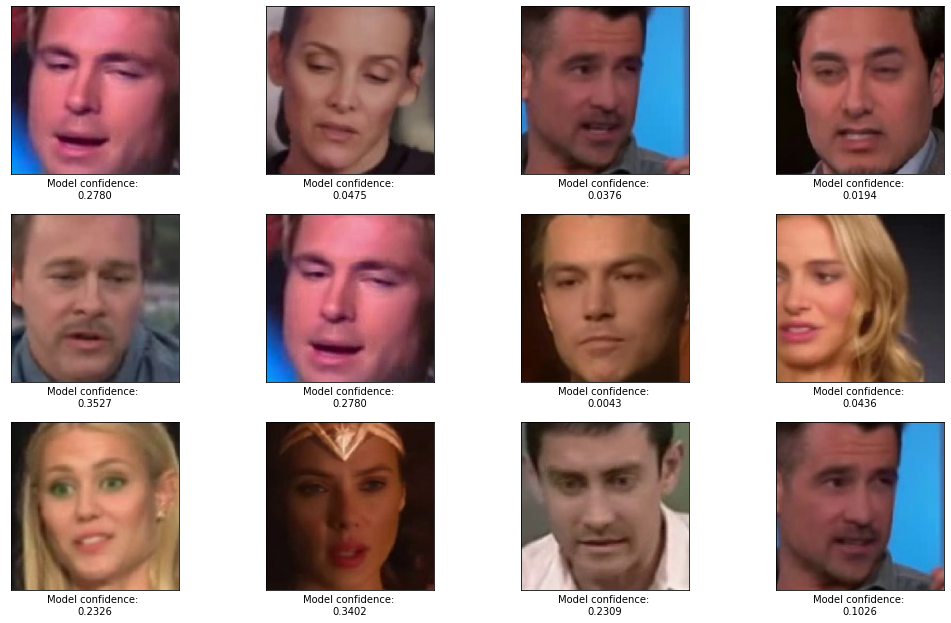

In [23]:
plotter(correct_deepfake, correct_deepfake_pred)

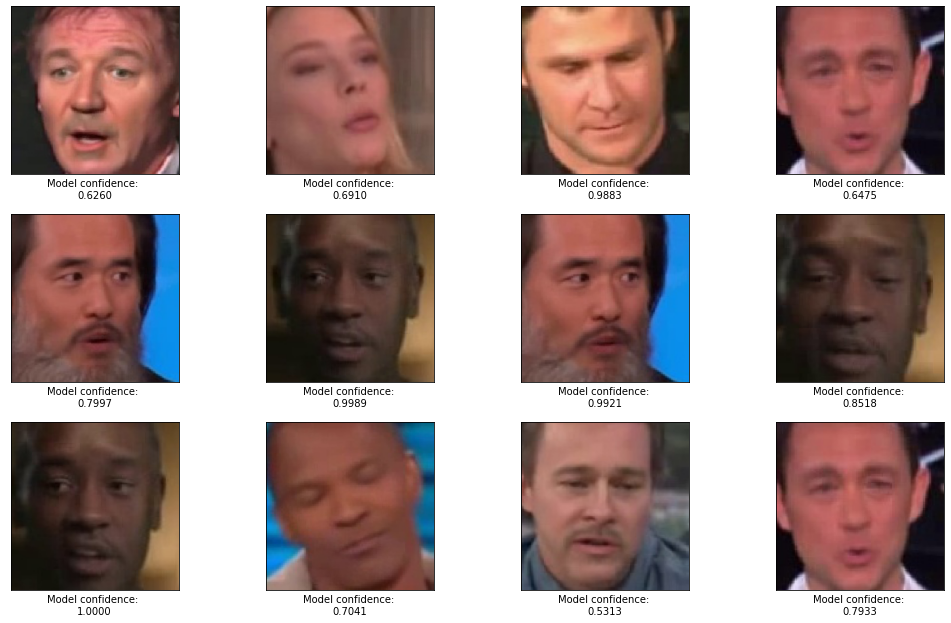

In [24]:
plotter(misclassified_deepfake, misclassified_deepfake_pred)

In [25]:
TP=len(correct_real_pred)
TN=len(correct_deepfake_pred)
FP=len(misclassified_real_pred)
FN=len(misclassified_deepfake_pred)


In [26]:
acc= ((TP+TN)/(TP+TN+FP+FN))*100
print(f' Accuracy:', acc)
prec=TP/(TP+FP)
print(f' Precision:', prec*100)
TPR = TP/(TP + FN)
print(f' TPR:', TPR*100)
FPR= FP/(TN+FP)
print(f' FPR:', FPR*100)

 Accuracy: 57.09281961471103
 Precision: 45.22968197879859
 TPR: 58.71559633027523
 FPR: 43.90934844192634


In [27]:
model_fpr,model_tpr,threshold = roc_curve(y_test,y_pred)
auc_model=auc(model_fpr,model_tpr)
auc_score=roc_auc_score(y_test,y_pred)

In [28]:
#print(threshold)
print(auc_score)

0.5734687868080095


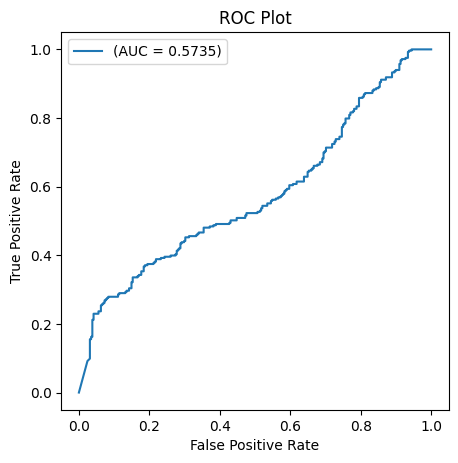

In [29]:
plt.figure(figsize=(5,5),dpi=100)

plt.plot(model_fpr,model_tpr, linestyle='-', label='(AUC = %0.4f)' % auc_model)
# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

Meso net 4
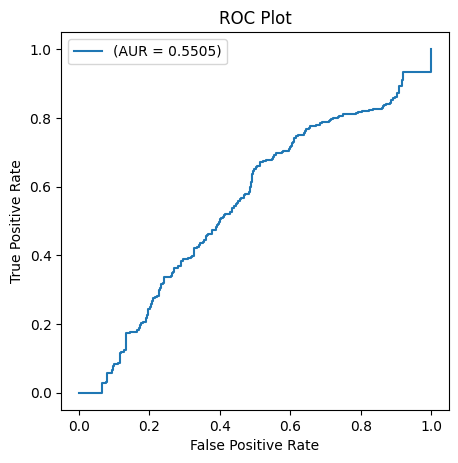

Meso 4 inception model
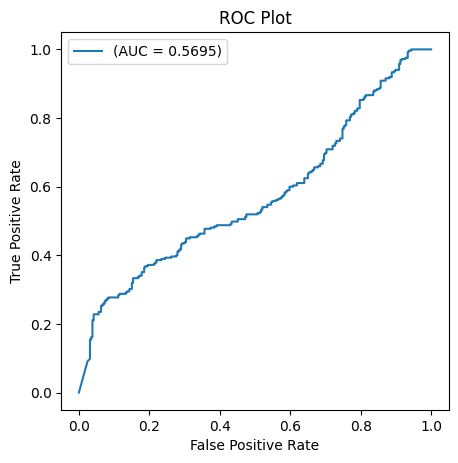